# Youtube Video & Channel Data Analysis
By Pin-Huey Chiang, Hung-Yi Lin

In this generation, people spend more time on watching Youtube videos. Youtuber has became one of the most popular career choice for young citizens. If a teenager loves to watch entertainment type of videos, such as PewDiePie and Logan Paul, he may dream of becoming a top-ranking Youtuber who films entertainment videos. This raised some research questions:
- Is filming entertainment channel a valuable decision for him/her? 
- If he/she reach the goal and become the top-ranking Youtuber, what is the condition he/she must know.

## Hypothesis

**Part 1**
- Entertainment videos will likely to trend more than other types of videos such as comedy, music, fashion, knowledge, and etc
- Among top-ranking Youtuber, it will be more profitable to operate the entertainment type channel than other types of channel such as comedy, music, fashion, knowledge

**Part 2**
- Top U.S. Youtubers will have more trending videos than other Youtube channels
- If you own a top-ranking Youtube channel in the U.S., you can make a big profit

## Part 1
## 1. 1 Entertainment videos will likely to trend more than other types of videos such as comedy, music, fashion, knowledge, and etc

**Youtube categories**

This analysis uses the categories that defined by Youtube, which includes Auto & Vehicles, Education, Entertainment, Food, Music, and so on. Youtubers can choose what kind of categories the video belongs to before uploading them to the platform in their video management webpage. 

Source: https://creatoracademy.youtube.com/page/lesson/overview-categories#strategies-zippy-link-2<br>


**Youtube Trending: Know what viewers want to see the most**

YouTube Trendings aims to let the users know what’s happening on YouTube and in the world. Thus, YouTube trending videos shows that they are appealing to a wide range of viewers, capture the breadth of what’s happening on YouTube and in the world, or surprising or novel in the specific moment. Trending Youtube videos are determined by several signals such as 
- view count
- the rate of growth in views, where views are coming from (including outside of YouTube)
- the age of the video. 

This means that the highest view count on a given day may not be #1 on Trending. In addition, even if one video meets all the criteria, it does not mean it will definitly enter Trending. The Trending system tries to choose videos that will be most relevant to their viewers and most reflective of the broad content on the platform. Therefore, by analyzing the Youtube trending videos, we can get an insight of what types of videos Youtube thinks viewers would want to see the most, and reflects to the events that happened in the given time. 

Source: https://support.google.com/youtube/answer/7239739?hl=en

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
trending_df = pd.read_csv('data/USvideos.csv')
category_id = pd.read_json('data/US_category_id.json')

In [4]:
len(trending_df)

40949

### Data Preprocessing of Trending Video Dataset
1. change category id to category name based on the US_category_id.json file
2. change the trending date and publish time to pandas timestamp
3. calculate the days one video spent to trend

In [5]:
# import category_id json file and dataframe 
def catId_to_name(catid):
    """ This function replaces category id to category name based on the json file.

    :param catid: category id which is resorded in the US_category_id.json file
    :param videodf: youtube video dataframe
    :return: category dictionary. key = id, value = category name
    >>> category_id = pd.read_json('data/US_category_id.json')
    >>> type(catId_to_name(category_id))
    <class 'dict'>
    >>> a = catId_to_name(category_id)
    >>> len(list(a.keys())) == len(category_id)
    True
    """
    cat_dict = {}
    for i in range(len(catid)):
        id = int(catid['items'][i]['id'])
        name = catid['items'][i]['snippet']['title']
        cat_dict[id] = name
    return cat_dict

In [6]:
# add category name to the dataframe
category_dict = catId_to_name(category_id)
trending_df['category_name'] = trending_df['category_id'].replace(category_dict)

In [7]:
# change publish time type to datetime
trending_df['publish_time'] = trending_df.publish_time.str[:10]
trending_df['publish_time'] = pd.to_datetime(trending_df['publish_time'])

In [8]:
# change trending date format to datetime format
trending_df['trending_date'] = trending_df['trending_date'].apply(lambda date: re.sub(r'(\d+).(\d+).(\d+)', r'20\1-\3-\2', date))
trending_df['trending_date'] = pd.to_datetime(trending_df['trending_date'])

In [9]:
# show the earliest and latest video publish date
min(trending_df['publish_time']), max(trending_df['publish_time']) 

(Timestamp('2006-07-23 00:00:00'), Timestamp('2018-06-14 00:00:00'))

In [10]:
# show the earliest and latest video trending date, which also represents the data capture time period
min(trending_df['trending_date']), max(trending_df['trending_date']) 

(Timestamp('2017-11-14 00:00:00'), Timestamp('2018-06-14 00:00:00'))

In [11]:
# calculate the days one video spent to become a trending video 
trending_df['days_spent_to_trend'] = trending_df['trending_date'] - trending_df['publish_time']
days = trending_df['days_spent_to_trend'].astype(str).str.split(" ", n = 1, expand = True)
trending_df['days_spent_to_trend'] = days[0].astype(int)

In [12]:
trending_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,days_spent_to_trend
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,1
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,2
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,1
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,2


### Trending Video Analysis

Show the earliest and latest video publish date, earliest and latest video trending data

In [13]:
trending_df['Month'] = trending_df['trending_date'].dt.month.astype(str) # .apply(lambda x: look_up[x])
trending_df['Year'] = trending_df['trending_date'].dt.year.astype(str)
trending_df['trend_MY'] = trending_df['Year']+'-'+trending_df['Month']
trending_df['trend_MY'] = pd.to_datetime(trending_df['trend_MY'])

# create a pivot table to see the number of trendings in each category in each month
trend_monpi = pd.pivot_table(trending_df, values=['category_id'], index=['trend_MY'], columns=['category_name'], aggfunc='count').fillna(0)

trend_monpi.index = ['Nov 2017', 'Dec 2017', 'Jan 2018', 'Feb 2018', 'Mar 2018', 'Apr 2018', 'May 2018', 'Jun 2018']
trend_monpi.columns = trend_monpi.columns.droplevel()

In [14]:
trend_monpi

category_name,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Travel & Events
Nov 2017,47.0,315.0,138.0,790.0,174.0,22.0,319.0,613.0,221.0,1.0,247.0,56.0,237.0,0.0,195.0,25.0
Dec 2017,58.0,579.0,224.0,1549.0,360.0,63.0,560.0,950.0,547.0,13.0,518.0,127.0,289.0,9.0,278.0,76.0
Jan 2018,91.0,465.0,254.0,1288.0,354.0,112.0,551.0,758.0,500.0,16.0,467.0,200.0,347.0,7.0,330.0,56.0
Feb 2018,129.0,423.0,235.0,1243.0,295.0,75.0,479.0,777.0,521.0,18.0,442.0,156.0,385.0,0.0,321.0,72.0
Mar 2018,16.0,524.0,328.0,1537.0,337.0,122.0,810.0,810.0,195.0,0.0,508.0,136.0,446.0,0.0,334.0,80.0
Apr 2018,34.0,407.0,204.0,1160.0,264.0,92.0,557.0,747.0,164.0,0.0,471.0,88.0,251.0,16.0,297.0,48.0
May 2018,9.0,510.0,207.0,1701.0,355.0,180.0,617.0,1121.0,276.0,5.0,401.0,101.0,336.0,19.0,332.0,29.0
Jun 2018,0.0,234.0,66.0,696.0,206.0,151.0,253.0,696.0,63.0,4.0,156.0,56.0,110.0,6.0,87.0,16.0


In [15]:
#calculate the percentage of number of trending videos per month in each category
trend_monpi_percent = (trend_monpi / trend_monpi.sum(axis = 0, skipna = True)).round(2)

In [16]:
# plt.subplots(figsize=(12,5))
# sns.heatmap(trend_monpi_percent, annot=True, cmap="YlGnBu")

cm = sns.light_palette(sns.color_palette()[6], as_cmap=True)
s = trend_monpi_percent.style.background_gradient(cmap=cm)
s

category_name,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Travel & Events
Nov 2017,0.12,0.09,0.08,0.08,0.07,0.03,0.08,0.09,0.09,0.02,0.08,0.06,0.1,0,0.09,0.06
Dec 2017,0.15,0.17,0.14,0.16,0.15,0.08,0.14,0.15,0.22,0.23,0.16,0.14,0.12,0.16,0.13,0.19
Jan 2018,0.24,0.13,0.15,0.13,0.15,0.14,0.13,0.12,0.2,0.28,0.15,0.22,0.14,0.12,0.15,0.14
Feb 2018,0.34,0.12,0.14,0.12,0.13,0.09,0.12,0.12,0.21,0.32,0.14,0.17,0.16,0,0.15,0.18
Mar 2018,0.04,0.15,0.2,0.15,0.14,0.15,0.2,0.13,0.08,0,0.16,0.15,0.19,0,0.15,0.2
Apr 2018,0.09,0.12,0.12,0.12,0.11,0.11,0.13,0.12,0.07,0,0.15,0.1,0.1,0.28,0.14,0.12
May 2018,0.02,0.15,0.12,0.17,0.15,0.22,0.15,0.17,0.11,0.09,0.12,0.11,0.14,0.33,0.15,0.07
Jun 2018,0,0.07,0.04,0.07,0.09,0.18,0.06,0.11,0.03,0.07,0.05,0.06,0.05,0.11,0.04,0.04


The type of videos audience likes to see the most may reflect the current events happened in US in a specific month.

In [17]:
#check the statistic summary of views in each category
view_describe = trending_df[['category_name', 'views']].groupby('category_name').describe()
pd.set_option('display.float_format', '{:.2f}'.format)
view_describe

views                                            \
                        count       mean         std      min       25%   
category_name                                                             
Autos & Vehicles       384.00 1355965.41  3373464.36  2860.00 104652.75   
Comedy                3457.00 1480308.42  2009898.63  1807.00 351261.00   
Education             1656.00  712940.82   879267.63   773.00 249115.25   
Entertainment         9964.00 2067883.20  5815995.95   798.00 273394.75   
Film & Animation      2345.00 3106250.20  5576254.91   943.00 302850.00   
Gaming                 817.00 2620830.63  3165317.91  1237.00 530676.00   
Howto & Style         4146.00  983730.12  1928994.99  1107.00 215422.25   
Music                 6472.00 6201003.12 15459879.47  1591.00 382714.75   
News & Politics       2487.00  592587.74  1118917.93   549.00  50855.00   
Nonprofits & Activism   57.00 2963884.07  7131112.13  1456.00  11453.00   
People & Blogs        3210.00 1531835.43  3459637.06   884.00 202658.50   
Pets & Animals         920.00  831143.47  1102091.26  3393.00 185072.25   
Science & Technology  2401.00 1452626.75  3445705.13   983.00 239189.00   
Shows                   57.00  903527.33   510866.78 36609.00 178191.00   
Sports                2174.00 2025969.03  4017255.25   658.00 194181.50   
Travel & Events        402.00  854619.61  1918995.03   789.00 221528.50   

                                                          
                             50%        75%          max  
category_name                                             
Autos & Vehicles       406278.00 1074284.25  25244097.00  
Comedy                 980236.00 1877801.00  29178096.00  
Education              419440.50  772115.00   7349435.00  
Entertainment          734704.00 1733746.25 149376127.00  
Film & Animation      1274578.00 3227166.00  54863912.00  
Gaming                1494142.00 3202761.00  16935442.00  
Howto & Style          502783.00 1098035.75  54155921.00  
Music                 1434128.00 4947952.75 225211923.00  
News & Politics        244014.00  685282.00  10277358.00  
Nonprofits & Activism   73649.00  316467.00  24286474.00  
People & Blogs         599139.00 1686941.50  56111957.00  
Pets & Animals         444501.50  941298.75   6187457.00  
Science & Technology   585748.00 1375783.00  42799458.00  
Shows                 1155692.00 1309964.00   1445949.00  
Sports                 559352.00 1406208.50  29090799.00  
Travel & Events        494825.50  985693.25  23932421.00

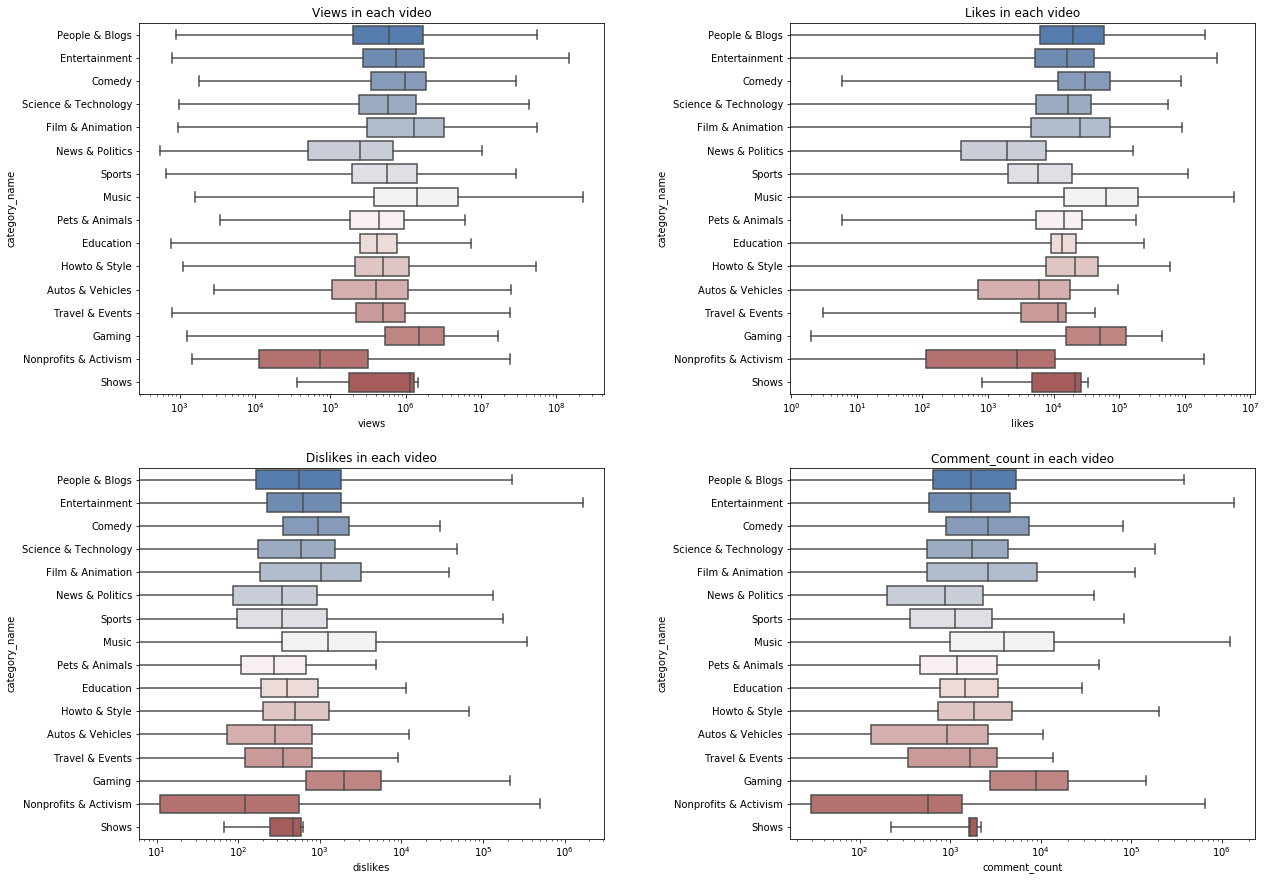

In [18]:
#create box plot for 
df_colname = ['views', 'likes', 'dislikes', 'comment_count']
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
for i, col in enumerate(df_colname):
    
    box = sns.boxplot(x=df_colname[i], y='category_name', data=trending_df, whis="range", palette="vlag", ax=axes[i // 2, i % 2])
    box.set(xscale="log") #rescale boxplot x-axis with log
    axes[i // 2, i % 2].set_title(df_colname[i].capitalize()+ ' in each video')

fig.subplots_adjust(wspace=.4)

In [19]:
# create a pivot table to calculate the "total" number of videos upload, views, likes, dislikes, comment counts, days spend to trend in each category
trending_pi = pd.pivot_table(trending_df, values=['views', 'likes', 'dislikes', 'comment_count', 'video_id', 'days_spent_to_trend'], 
                             index=['category_name'], aggfunc={'views': np.sum, 'likes': np.sum, 'dislikes': np.sum, 
                                                            'comment_count': np.sum,'video_id': 'count', 
                                                               'days_spent_to_trend':np.sum})

trending_pi = trending_pi[['video_id', 'views', 'likes', 'dislikes', 'comment_count', 'days_spent_to_trend']]
trending_pi.columns = ['video_count', 'views', 'likes', 'dislikes', 'comment_count', 'days_spent_to_trend']
trending_pi = trending_pi.sort_values('video_count', ascending=False)

In [20]:
trending_pi

,video_count,views,likes,dislikes,comment_count,days_spent_to_trend
category_name,,,,,,
Entertainment,9964,20604388195,530516491,42987663,73566498,129617
Music,6472,40132892190,1416838584,51179008,125296396,95292
Howto & Style,4146,4078545064,162880075,5473899,23149550,32809
Comedy,3457,5117426208,216346746,7230391,22545582,34941
People & Blogs,3210,4917191726,186615999,10187901,24778032,50350
News & Politics,2487,1473765704,18151033,4180049,6039433,46213
Science & Technology,2401,3487756816,82532638,4548402,11989926,43612
Film & Animation,2345,7284156721,165997476,6075148,17887060,96286
Sports,2174,4404456673,98621211,5133551,11192155,50992


In [21]:
# find categories that do not enter the trending videos 
trendcat = list(trending_pi.index)
catList = list(category_dict.values())
not_trend_cat = []
for i in range(len(catList)):
    if catList[i] not in trendcat:
        not_trend_cat.append(catList[i])
print(len(not_trend_cat))
print(not_trend_cat)

15
['Short Movies', 'Videoblogging', 'Movies', 'Anime/Animation', 'Action/Adventure', 'Classics', 'Documentary', 'Drama', 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Trailers']


In [22]:
# count average number of 'views', 'likes', 'dislikes', 'comment_count', 'days_spent_to_trend' per video in each category
trending_pi_avg = trending_pi[['views', 'likes', 'dislikes', 'comment_count', 'days_spent_to_trend']].div(trending_pi['video_count'], axis=0).round(2)

# calculate the percentage of likes and dislikes
trending_pi_avg['likes(%)'] = trending_pi_avg['likes'] / (trending_pi_avg['likes'] + trending_pi_avg['dislikes'])
trending_pi_avg['dislikes(%)'] = trending_pi_avg['dislikes'] / (trending_pi_avg['likes'] + trending_pi_avg['dislikes'])

trending_pi_avg.columns = ['Avg Views', 'Avg Likes','Avg Dislikes','Avg Comment Count', 'Avg Days Spent to Trend', 'Likes(%)', 'Dislikes(%)']

In [23]:
cm = sns.light_palette(sns.color_palette()[0], as_cmap=True)
trending_pi_avg.style.format("{:.2f}").background_gradient(cmap=cm)

,Avg Views,Avg Likes,Avg Dislikes,Avg Comment Count,Avg Days Spent to Trend,Likes(%),Dislikes(%)
category_name,,,,,,,
Entertainment,2067883.20,53243.33,4314.30,7383.23,13.01,0.93,0.07
Music,6201003.12,218918.20,7907.76,19359.76,14.72,0.97,0.03
Howto & Style,983730.12,39286.08,1320.28,5583.59,7.91,0.97,0.03
Comedy,1480308.42,62582.22,2091.52,6521.72,10.11,0.97,0.03
People & Blogs,1531835.43,58135.83,3173.80,7719.01,15.69,0.95,0.05
News & Politics,592587.74,7298.36,1680.76,2428.40,18.58,0.81,0.19
Science & Technology,1452626.75,34374.28,1894.38,4993.72,18.16,0.95,0.05
Film & Animation,3106250.20,70787.84,2590.68,7627.74,41.06,0.96,0.04
Sports,2025969.03,45363.94,2361.34,5148.19,23.46,0.95,0.05


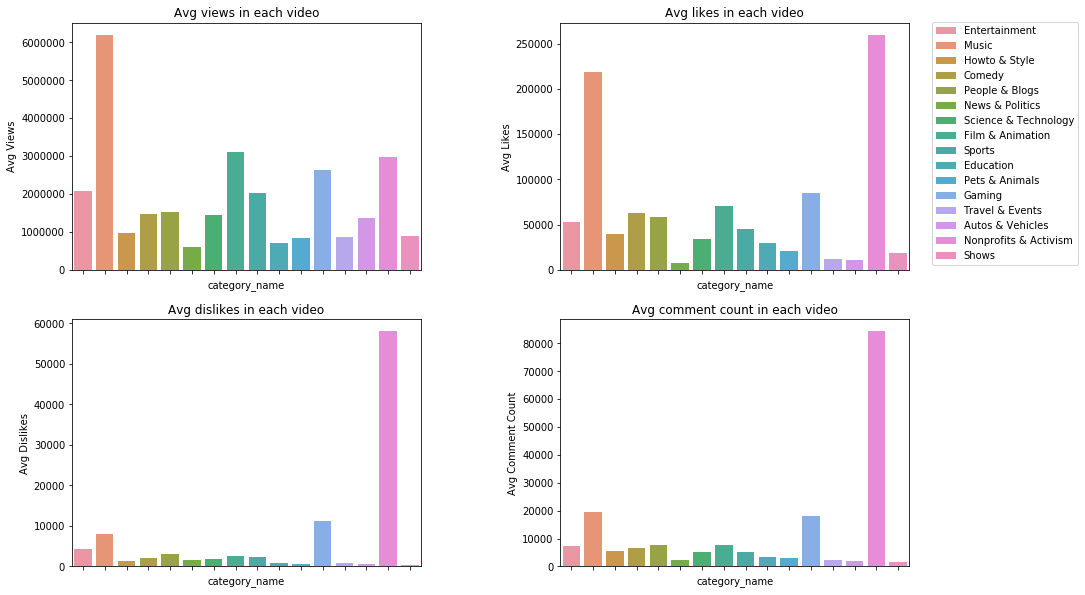

In [24]:
# Use Barchart to visualize the data
colname = ['Avg Views', 'Avg Likes','Avg Dislikes','Avg Comment Count']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(colname):
    if i != len(colname)-1:
        sns.barplot(data = trending_pi_avg, x = trending_pi_avg.index, y = col, ax=axes[i // 2, i % 2])
    else:
        sns.barplot(data = trending_pi_avg, x = trending_pi_avg.index, y = col, ax=axes[i // 2, i % 2], hue=trending_pi_avg.index, dodge=False)
    axes[i // 2, i % 2].set_xticklabels('')
    axes[i // 2, i % 2].set_title(colname[i].capitalize()+ ' in each video')


fig.subplots_adjust(wspace=.4)
plt.legend(bbox_to_anchor=(1.05, 2.225), loc=2, ncol=1)

In [25]:
def highlight_min(s):
    '''
    highlight the minimum in a Series or DataFrame
    '''
    is_min = s == s.min()
    return ['background-color: orange' if v else '' for v in is_min]

In [26]:
def highlight_max(s):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [27]:
#check the statistic summary of days spent to trend in each category
days_describe = trending_df[['category_name', 'days_spent_to_trend']].groupby('category_name').describe()
s = days_describe.style.apply(highlight_min).apply(highlight_max)
s

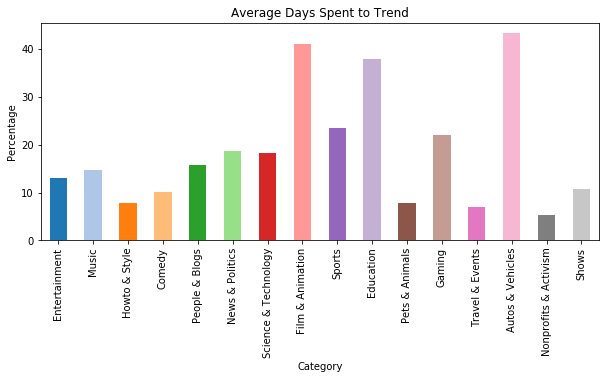

In [28]:
# sns.barplot(data = trending_pi_avg, x = trending_pi_avg.index, y = 'Avg Days Spent to Trend', dodge=False)
# sns.set(rc={'figure.figsize':(20,5)})
colors = plt.cm.tab20(np.linspace(0, 1, 20))
ax = trending_pi_avg['Avg Days Spent to Trend'].plot(kind='bar', align='center', figsize=(10,4),
                                                       color=colors,title='Average Days Spent to Trend')
ax.set_xlabel("Category")
ax.set_ylabel("Percentage")
ax.set_xticklabels(trending_pi_avg.index)
ax

### Findings

According to the result, most of the videos spent average 1 to 10 days to become trending videos. There are some outliers spend within 1 day to trend, while others spent years to trend. Entertainment type has the most trending videos, and music, howto & style, comedy, people & blogs, news & politics are other famous types. 15 categories such as movies, animation, documentary did not have any trending videos from 2017-11-14 to 2018-06-14.

Although entertainment videos have the most trending videos during the data captured period, it does not mean filming entertainment videos will definitely make your videos trend more. The proportion of "num of trending videos / num of videos upload entertainment" may not be the highest. However, there is no data to know how many numbers of videos upload during a specific period so it is hard to know the percentage of trending videos among the number of uploads in one category. Therefore, it is necessary to find other indicators such as average of views/likes/dislikes/comments in per trending video, average time a video need to spend from publish to upload. 

According to the result, music, entertainment, gaming, film & animation, nonprofits & activism videos have higher values than other categories, which shows that audiences like to watch these types of videos more than other types. Another interesting finding is that despite of the least trending video counts among the categories, average likes, dislikes, number of comments per video of nonprofits & activism videos is the highests, and the days it spent to trend were shorter than most of the categories. We can conclude that nonprofits videos that are able to trend really caused many people's attention. 

## 1.2 Among top-ranking Youtuber, it will be more profitable to operate the entertainment type channel than other types of channel such as comedy, music, fashion, knowledge
- Does video categories with more trending videos also shown as profitable categories? 
- Find the most profitable channel type

In [29]:
# load data
top250_subs_df = pd.read_csv('data/top250_us_youtube_by_subs.csv')
top250_views_df = pd.read_csv('data/top250_us_youtube_by_views.csv')

In [30]:
def drop_col0(df):
    """ This function drop the Unnamed 0 column from the dataframe.

    :param df: dataframe
    :return: a clean dataframe
    >>> df = pd.read_csv('data/top250_us_youtube_by_subs.csv')
    >>> top250_subs_df = drop_col0(df)
    >>> (len(df.columns) - 1) == len(top250_subs_df.columns)
    True
    """
    df = df.drop(df.columns[0], axis=1)
    return df

In [31]:
top250_subs_df = drop_col0(top250_subs_df)
top250_views_df = drop_col0(top250_views_df)

### Data Preprocessing

In [32]:
# check whether the category names are the same in two datasets
print(top250_subs_df['Category'].unique(), '\n')
print(trending_pi_avg.index)

['Entertainment' 'Howto' 'Education' 'Sports' 'Music' 'News' 'Film'
 'Comedy' 'Games' 'People' nan 'Nonprofit' 'Animals' 'Tech'] 

Index(['Entertainment', 'Music', 'Howto & Style', 'Comedy', 'People & Blogs',
       'News & Politics', 'Science & Technology', 'Film & Animation', 'Sports',
       'Education', 'Pets & Animals', 'Gaming', 'Travel & Events',
       'Autos & Vehicles', 'Nonprofits & Activism', 'Shows'],
      dtype='object', name='category_name')


In [33]:
catname_dict = {'Entertainment': 'Entertainment', 'Howto': 'Howto & Style', 'Education': 'Education', 'Sports': 'Sports', 
                'Music': 'Music', 'News': 'News & Politics', 'Film': 'Film & Animation', 'Comedy':'Comedy', 'Games':'Gaming', 'People': 'People & Blogs',
               'Nonprofit': 'Nonprofits & Activism', 'Animals': 'Pets & Animals', 'Tech': 'Science & Technology'}

In [34]:
# change the category name to the same as trending videos dataset
top250_subs_df = top250_subs_df.replace(catname_dict) 
top250_subs_df['Category'].unique()

top250_views_df = top250_views_df.replace(catname_dict) 
top250_views_df['Category'].unique()

array(['Sports', 'Entertainment', 'Education', 'Film & Animation',
       'Music', 'People & Blogs', 'Howto & Style', 'Gaming', 'Comedy',
       'News & Politics', nan, 'Science & Technology',
       'Nonprofits & Activism'], dtype=object)

In [35]:
max_earn = top250_subs_df['Max Monthly Earning'].astype(int)
min_earn = top250_subs_df['Min Monthly Earning'].astype(int)

top250_subs_df['Avg Monthly Earnings'] = (max_earn + min_earn) / 2

In [36]:
# clean the data - some row of data contains ',' and '--' which will not allow us to directly transfer the datatype 
top250_views_df['Views'] = top250_views_df['Views'].astype(str).str.replace(',', '')
top250_views_df['Subscribers'] = top250_views_df['Subscribers'].astype(str).str.replace('--', '0')

In [37]:
# turn the object type into string type first, than Int64
top250_views_df['Views'] = top250_views_df['Views'].astype(int)
top250_views_df['Subscribers'] = top250_views_df['Subscribers'].astype(int)

In [38]:
top250_subs_df.head()

,US Rank,Grade,Name,Uploads,Subscribers,Views,Category,Created Date,Daily Average Subs,Daily Average Views,Min Daily Earning,Max Daily Earning,Min Monthly Earning,Max Monthly Earning,Min Yearly Earning,Max Yearly Earning,World Subscriber Rank,World Video View Rank,URL,Avg Monthly Earnings
0,1,A+,PewDiePie,3806,94275479,21161543119,Entertainment,"Apr 29th, 2010",146229,13416000,3400.00,53700,100600,1600000,1200000,19300000,3,11,https://socialblade.com/youtube/user/pewdiepie,850300.00
1,2,A+,5-Minute Crafts,2973,53832999,13291598454,Howto & Style,"Nov 15th, 2016",64674,15396600,3800.00,61600,115500,1800000,1400000,22200000,7,36,https://socialblade.com/youtube/user/295-dw_td...,957750.00
2,3,A++,Cocomelon - Nursery Rhymes,416,44131654,25541274029,Education,"Sep 1st, 2006",125711,88514800,22100.00,354100,663900,10600000,8000000,127500000,11,7,https://socialblade.com/youtube/user/checkgate,5631950.00
3,4,A+,WWE,40805,42100827,31435620458,Sports,"May 11th, 2007",45303,24296400,6100.00,97200,182200,2900000,2200000,35000000,12,3,https://socialblade.com/youtube/user/wwefannation,1541100.00
4,5,A,Dude Perfect,202,41275631,7684220326,Sports,"Mar 17th, 2009",37131,7820910,2000.00,31300,58700,938500,703900,11300000,13,111,https://socialblade.com/youtube/user/corycotton,498600.00


In [39]:
top250_views_df.head()

,US Rank,Grade,Name,Uploads,Subscribers,Views,Category,Created Date,Daily Average Subs,Daily Average Views,Min Daily Earning,Max Daily Earning,Min Monthly Earning,Max Monthly Earning,Min Yearly Earning,Max Yearly Earning,World Subscriber Rank,World Video View Rank,URL
0,1,A+,WWE,40805,42099730,31435620458,Sports,"May 11th, 2007",45303,24296400,6100,97200,182200,2900000,2200000,35000000,12,3,https://socialblade.com/youtube/user/wwefannation
1,2,A+,Ryan ToysReview,1356,18989260,28730791075,Entertainment,"Mar 17th, 2015",11527,19519500,4900,78100,146400,2300000,1800000,28100000,101,4,https://socialblade.com/youtube/user/hgjghz9so...
2,3,A++,Cocomelon - Nursery Rhymes,416,44127136,25541274029,Education,"Sep 1st, 2006",125711,88514800,22100,354100,663900,10600000,8000000,127500000,11,7,https://socialblade.com/youtube/user/checkgate
3,4,A+,Movieclips,32246,24964732,22285854340,Film & Animation,"Apr 28th, 2006",37300,25595300,6400,102400,192000,3100000,2300000,36900000,46,10,https://socialblade.com/youtube/user/movieclips
4,5,A+,PewDiePie,3806,94272352,21161543119,Entertainment,"Apr 29th, 2010",146229,13416000,3400,53700,100600,1600000,1200000,19300000,3,11,https://socialblade.com/youtube/user/pewdiepie


### Does video categories with more trending videos also shown as profitable categories? 

In [40]:
top250_pi = pd.pivot_table(top250_subs_df, values=['Uploads', 'Subscribers', 'Views', 'Avg Monthly Earnings'], 
                             index=['Category'], aggfunc=np.sum)
top250_pi

,Avg Monthly Earnings,Subscribers,Uploads,Views
Category,,,,
Comedy,2029955.00,254399126,20531,73047997574
Education,8365100.00,141720620,9464,73128327918
Entertainment,13191136.00,851742251,92339,278771091821
Film & Animation,3384128.50,128477793,44172,54455689097
Gaming,3879950.00,281896672,200604,99185898917
Howto & Style,2482896.00,205081512,11927,37826732048
Music,13715329.50,1308052631,29794,455643106523
News & Politics,41100.00,37592720,346,2260660195
Nonprofits & Activism,180150.00,18241267,131855,3252874897


In [41]:
trending_pi = trending_pi.reset_index()
top250_pi = top250_pi.reset_index()

In [42]:
trending_top250 = pd.merge(trending_pi, top250_pi, left_on='category_name', right_on='Category', how='left', indicator=True)
trending_top250

,category_name,video_count,views,likes,dislikes,comment_count,days_spent_to_trend,Category,Avg Monthly Earnings,Subscribers,Uploads,Views,_merge
0,Entertainment,9964,20604388195,530516491,42987663,73566498,129617,Entertainment,13191136.00,851742251.00,92339.00,278771091821.00,both
1,Music,6472,40132892190,1416838584,51179008,125296396,95292,Music,13715329.50,1308052631.00,29794.00,455643106523.00,both
2,Howto & Style,4146,4078545064,162880075,5473899,23149550,32809,Howto & Style,2482896.00,205081512.00,11927.00,37826732048.00,both
3,Comedy,3457,5117426208,216346746,7230391,22545582,34941,Comedy,2029955.00,254399126.00,20531.00,73047997574.00,both
4,People & Blogs,3210,4917191726,186615999,10187901,24778032,50350,People & Blogs,2329741.50,189862946.00,25276.00,66236348800.00,both
5,News & Politics,2487,1473765704,18151033,4180049,6039433,46213,News & Politics,41100.00,37592720.00,346.00,2260660195.00,both
6,Science & Technology,2401,3487756816,82532638,4548402,11989926,43612,Science & Technology,252100.00,41278242.00,5721.00,5705200278.00,both
7,Film & Animation,2345,7284156721,165997476,6075148,17887060,96286,Film & Animation,3384128.50,128477793.00,44172.00,54455689097.00,both
8,Sports,2174,4404456673,98621211,5133551,11192155,50992,Sports,2229450.00,94547737.00,71597.00,44647698044.00,both
9,Education,1656,1180629990,49257772,1351972,5442242,62870,Education,8365100.00,141720620.00,9464.00,73128327918.00,both


In [43]:
trending_top250[['category_name', 'video_count', 'Avg Monthly Earnings']]

,category_name,video_count,Avg Monthly Earnings
0,Entertainment,9964,13191136.00
1,Music,6472,13715329.50
2,Howto & Style,4146,2482896.00
3,Comedy,3457,2029955.00
4,People & Blogs,3210,2329741.50
5,News & Politics,2487,41100.00
6,Science & Technology,2401,252100.00
7,Film & Animation,2345,3384128.50
8,Sports,2174,2229450.00
9,Education,1656,8365100.00


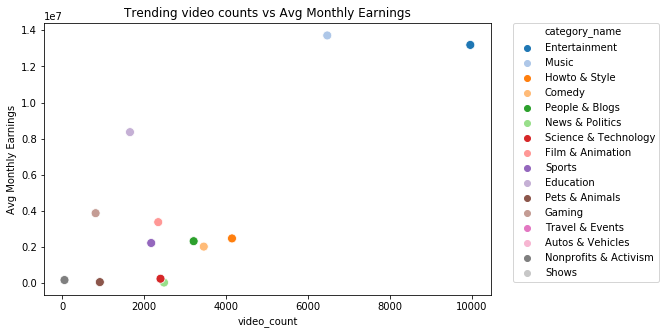

In [44]:
plt.subplots(figsize=(8,5))
cmap = sns.color_palette('tab20', n_colors=16)
g4 = sns.scatterplot(x="video_count", y="Avg Monthly Earnings", data=trending_top250, 
                     hue="category_name", s=80, palette=cmap)
g4.set_title('Trending video counts vs Avg Monthly Earnings')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Video Channel Type Profit Analysis

In [45]:
# sort the data and prepare for detecting outlier - extremely high and low
desc_subs = top250_subs_df.sort_values(by='Max Yearly Earning',ascending=False)
desc_views = top250_views_df.sort_values(by='Max Yearly Earning',ascending=False)

In [46]:
# drop the outlier
desc_subs.drop(desc_subs.head(1).index,inplace=True)
desc_subs.drop(desc_subs.tail(3).index,inplace=True)
desc_views.drop(desc_views.head(1).index,inplace=True)
desc_views.drop(desc_views.tail(3).index,inplace=True)

In [47]:
# pivot table which is used for categorizing channel type
def pivottable_Creation(df_name):
    """ The function is used for categorizing channel type.

    :param df_name: dataframe
    :return: a complete dataframe
    >>> top250_subs_df = pd.read_csv('data/top250_us_youtube_by_subs.csv')
    >>> categories_subs_df = pivottable_Creation(top250_subs_df)
    >>> categories_subs_df.columns[1] == 'Min Yearly Earning'
    True
    """
    pivotTable = pd.pivot_table(df_name, values=['Uploads', 'Subscribers', 'Views', 'URL', 'Min Yearly Earning', 'Max Yearly Earning'], 
                            index=['Category'], aggfunc={'Uploads': np.sum, 'Subscribers': np.sum, 'Views': np.sum, 
                                                         'URL': 'count', 'Min Yearly Earning':np.sum, 'Max Yearly Earning':np.sum})
    return pivotTable

In [48]:
# whole dataset
categories_subs_df = pivottable_Creation(top250_subs_df)
categories_views_df = pivottable_Creation(top250_views_df)

# dataset without outlier
data_subs = pivottable_Creation(desc_subs)
data_views = pivottable_Creation(desc_views)

In [49]:
# add avg earning column - total earning / channel count
def dataframe_Creation(df_name):
    """ The function is used for add a column which demonstrates the average earning value.

    :param df_name: dataframe
    :return: a complete dataframe
    >>> top250_subs_df = pd.read_csv('data/top250_us_youtube_by_subs.csv')
    >>> categories_subs_df = pivottable_Creation(top250_subs_df)
    >>> categories_subs_info = dataframe_Creation(categories_subs_df)
    >>> categories_subs_info.columns[1] == 'Max Yearly Earning'
    True
    """
    df_name.columns = ['Max Yearly Earning', 'Min Yearly Earning', 'Subscribers', 'Youtuber Count', 'Uploads', 'Views']
    df_name['Avg Min Yearly Earning'] = df_name['Min Yearly Earning'] / df_name['Youtuber Count']
    df_name['Avg Max Yearly Earning'] = df_name['Max Yearly Earning'] / df_name['Youtuber Count']
    pd.options.display.float_format = '{:.2f}'.format
    df_name.reset_index(inplace=True)
    df_name = df_name.sort_values(by=['Avg Max Yearly Earning'], ascending=False)
    return df_name

In [50]:
# whole dataset
categories_subs_info = dataframe_Creation(categories_subs_df)
categories_views_info = dataframe_Creation(categories_views_df)

# dataset without outlier
info_subs = dataframe_Creation(data_subs)
info_views = dataframe_Creation(data_views)

In [51]:
# whole dataset
d1 = categories_subs_info [['Category', 'Youtuber Count']]
d2 = categories_views_info [['Category', 'Youtuber Count']]
info = pd.merge(d1, d2, how='outer', on=['Category'])
info.set_index('Category', inplace=True)
info.columns = ['Channel frequncy by subs', 'Channel frequncy by views']
info.fillna(0, inplace=True)
info['Channel frequncy by views'] = info['Channel frequncy by views'].replace('$', '').astype('int64')
info.sort_values(by=['Channel frequncy by subs', 'Channel frequncy by views'], ascending=False, inplace=True)

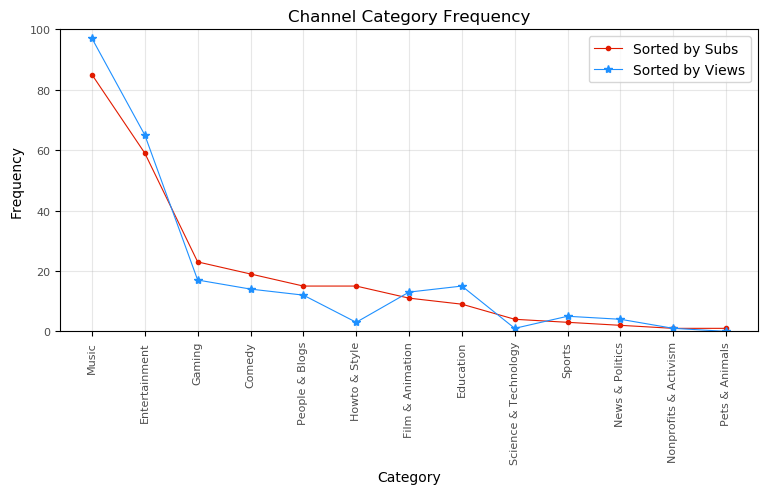

In [52]:
# ranking channel frequncy plot in each catrgory
subsf_info = info['Channel frequncy by subs']
viewsf_info = info['Channel frequncy by views']

plt.figure(figsize=(9,4), dpi= 100)
plt.plot(subsf_info, linewidth = 0.8, marker = '.', label = "Sorted by Subs", color='#E11B00')
plt.plot(viewsf_info, linewidth = 0.8, marker = '*', label = "Sorted by Views", color='#1E90FF')

plt.xlabel("Category") 
plt.ylabel("Frequency") 
plt.ylim(0, 100)
plt.xticks(horizontalalignment='center', alpha=.7, rotation=90, fontsize=8) 
plt.yticks(alpha=.7, fontsize=8) 
plt.title("Channel Category Frequency") 
plt.grid(axis='both', alpha=.3)
plt.legend()
plt.show()

In [53]:
def barPlot_Creation(datafram_name):
    """ The function creates dataframe for the barplot.

    :param dataframe_name: dataframe
    :return: a simplified dataframe
    >>> top250_subs_df = pd.read_csv('data/top250_us_youtube_by_subs.csv')
    >>> categories_subs_df = pivottable_Creation(top250_subs_df)
    >>> categories_subs_info = dataframe_Creation(categories_subs_df)
    >>> info = barPlot_Creation(categories_subs_info)
    >>> info.columns[0] == 'stat'
    True
    """
    max_stat = datafram_name['Avg Max Yearly Earning'].sort_values(ascending=False)
    min_stat = datafram_name['Avg Min Yearly Earning'].sort_values(ascending=False)
    mid_stat = ((max_stat + min_stat) / 2).tolist()
    stats = datafram_name['Category'].tolist()
    max_info = pd.DataFrame(list(zip(stats, max_stat)), columns=['stat','value'])
    min_info = pd.DataFrame(list(zip(stats, min_stat)), columns=['stat','value'])
    mid_info = pd.DataFrame(list(zip(stats, mid_stat)), columns=['stat','value'])
    
    return mid_info

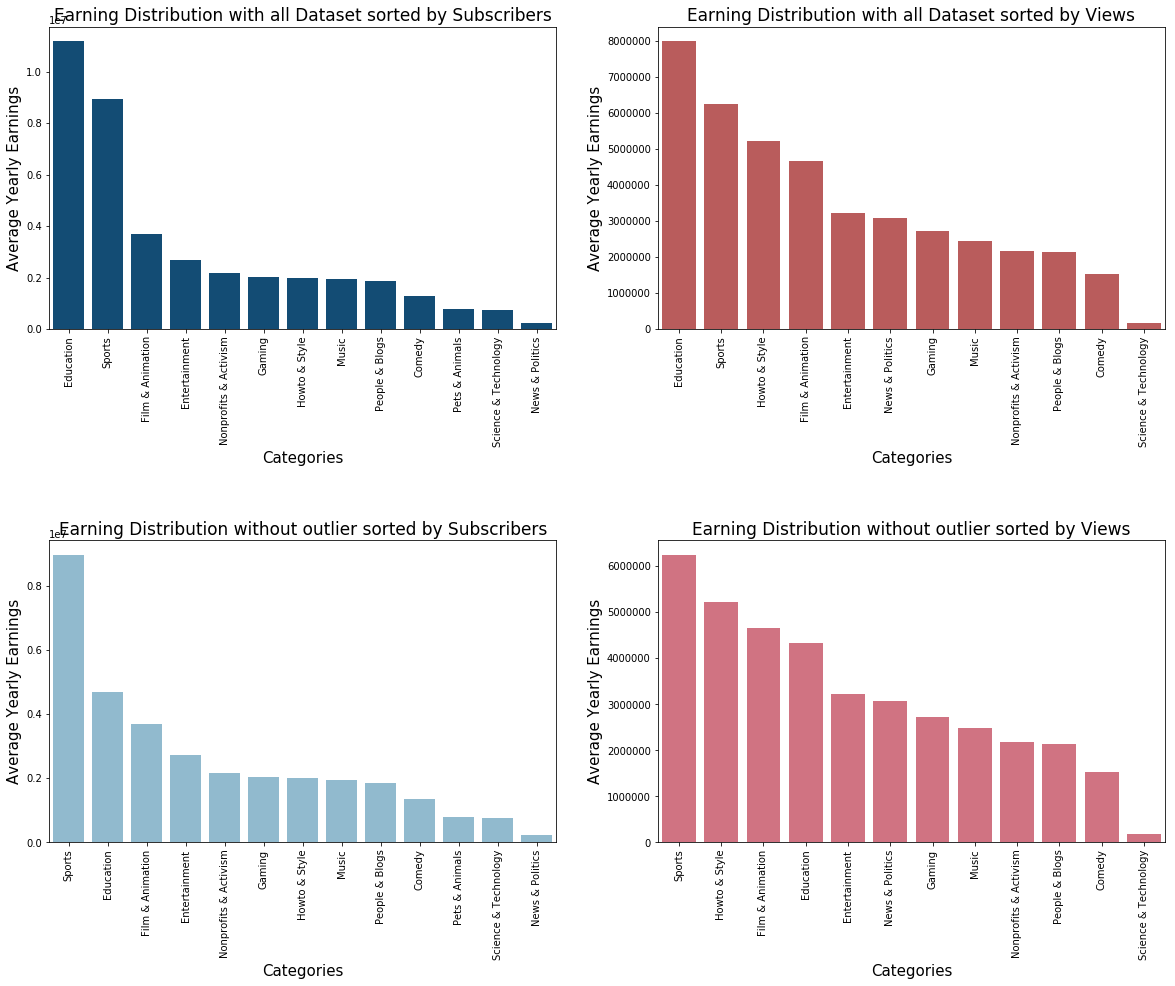

In [54]:
#create box plot for 
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

mid_info1 = barPlot_Creation(categories_subs_info)
b1 = sns.barplot(data = mid_info1, x = mid_info1['stat'], y = 'value', ax=axes[0, 0], color='#034f84')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
axes[0, 0].set_title('Earning Distribution with all Dataset sorted by Subscribers', fontsize=17)
axes[0, 0].set_ylabel('Average Yearly Earnings', fontsize=15)
axes[0, 0].set_xlabel('Categories', fontsize=15)

mid_info2 = barPlot_Creation(categories_views_info)
cmap2 = sns.color_palette('Paired', n_colors=1)
b2 = sns.barplot(data = mid_info2, x = mid_info2['stat'], y = 'value', ax=axes[0, 1], color='#c94c4c')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)
axes[0, 1].set_title('Earning Distribution with all Dataset sorted by Views', fontsize=17)
axes[0, 1].set_ylabel('Average Yearly Earnings', fontsize=15)
axes[0, 1].set_xlabel('Categories', fontsize=15)

mid_info3 = barPlot_Creation(info_subs)
cmap3 = sns.color_palette('Paired', n_colors=1)
b3 = sns.barplot(data = mid_info3, x = mid_info3['stat'], y = 'value', ax=axes[1, 0], color='#87bdd8')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)
axes[1, 0].set_title('Earning Distribution without outlier sorted by Subscribers', fontsize=17)
axes[1, 0].set_ylabel('Average Yearly Earnings', fontsize=15)
axes[1, 0].set_xlabel('Categories', fontsize=15)

mid_info4 = barPlot_Creation(info_views)
cmap4 = sns.color_palette('Paired', n_colors=1)
b4 = sns.barplot(data = mid_info4, x = mid_info4['stat'], y = 'value', ax=axes[1, 1], color='#e06377')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)
axes[1, 1].set_title('Earning Distribution without outlier sorted by Views', fontsize=17)
axes[1, 1].set_ylabel('Average Yearly Earnings', fontsize=15)
axes[1, 1].set_xlabel('Categories', fontsize=15)

fig.subplots_adjust(wspace=.2, hspace=.7)

The earining distribution barplots includes official and private channel data. For example, there are different kinds of channel in sports category, such as WWE, ESPN and Dude Perfect. The first two are official channels which already own lots of audiences on Youtube. Dude Perfect is the private channel that raises the popularity from nothing.

In [55]:
educationViews = top250_views_df[top250_views_df['Category'] == 'Education']
educationViews = educationViews.sort_values(by='Max Yearly Earning',ascending=True)
educationViews['Avg Yearly Earning'] = (educationViews['Max Yearly Earning'] + educationViews['Min Yearly Earning']) / 2

entertainmentViews = top250_views_df[top250_views_df['Category'] == 'Entertainment']
entertainmentViews_tail = entertainmentViews.sort_values(by='Max Yearly Earning',ascending=True)[:10]
entertainmentViews_top = entertainmentViews.sort_values(by='Max Yearly Earning',ascending=True)[55:]
entertainmentViews_tail['Avg Yearly Earning'] = (entertainmentViews_tail['Max Yearly Earning'] + entertainmentViews_tail['Min Yearly Earning']) / 2
entertainmentViews_top['Avg Yearly Earning'] = (entertainmentViews_top['Max Yearly Earning'] + entertainmentViews_top['Min Yearly Earning']) / 2

In [56]:
# notice that their might be the outlier among the data - $0.00 
educationViews.describe()

,US Rank,Uploads,Subscribers,Views,Daily Average Views,Min Daily Earning,Max Daily Earning,Min Monthly Earning,Max Monthly Earning,Min Yearly Earning,Max Yearly Earning,World Subscriber Rank,World Video View Rank,Avg Yearly Earning
count,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00
mean,133.40,1113.13,10309591.07,6857156364.33,10345045.27,2595.93,41700.00,78200.00,1248293.33,942900.00,15006666.67,1012.53,306.27,7974783.33
std,87.10,809.17,10559040.99,6555615001.13,22265313.54,5549.15,88902.64,166688.52,2661147.33,2008647.34,32013935.95,821.84,199.57,17011277.02
min,3.00,157.00,3084243.00,2891962785.00,-903511.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,7.00,0.00
25%,68.00,600.50,4119910.50,3250797769.00,1505075.00,376.50,6050.00,11300.00,180600.00,135450.00,2150000.00,302.00,157.50,1142725.00
50%,133.00,864.00,6427522.00,4338437422.00,4380210.00,1100.00,17500.00,32900.00,525600.00,394200.00,6300000.00,832.00,302.00,3347100.00
75%,203.50,1227.50,11527690.50,6355278239.50,6521455.00,1600.00,26050.00,48900.00,782550.00,586950.00,9350000.00,1697.50,465.00,4968475.00
max,246.00,2683.00,44127136.00,25541274029.00,88514800.00,22100.00,354100.00,663900.00,10600000.00,8000000.00,127500000.00,2650.00,565.00,67750000.00


In [57]:
educationViews[educationViews['Max Yearly Earning'] == 0]

,US Rank,Grade,Name,Uploads,Subscribers,Views,Category,Created Date,Daily Average Subs,Daily Average Views,Min Daily Earning,Max Daily Earning,Min Monthly Earning,Max Monthly Earning,Min Yearly Earning,Max Yearly Earning,World Subscriber Rank,World Video View Rank,URL,Avg Yearly Earning
73,74,A,Kids TV - Nursery Rhymes And Baby,2444,12154359,6076353301,Education,"Aug 30th, 2013",12910,-290520,0,0,0,0,0,0,267,175,https://socialblade.com/youtube/user/7pq3ko42y...,0.00
184,185,B+,Kids Channel - Cartoon Videos for,2494,4057289,3414780410,Education,"Jul 13th, 2013",3033,-903511,0,0,0,0,0,0,1734,430,https://socialblade.com/youtube/user/thekydstv,0.00


In [58]:
# drop the first row of the dataframe
educationViews.drop(educationViews.head(2).index,inplace=True)

In [59]:
educationViews

,US Rank,Grade,Name,Uploads,Subscribers,Views,Category,Created Date,Daily Average Subs,Daily Average Views,Min Daily Earning,Max Daily Earning,Min Monthly Earning,Max Monthly Earning,Min Yearly Earning,Max Yearly Earning,World Subscriber Rank,World Video View Rank,URL,Avg Yearly Earning
132,133,B+,TheEngineeringFamily,2683,3084243,4338437422,Education,"Jan 30th, 2012",516,1167590,292,4700,8800,140100,105100,1700000,2650,302,https://socialblade.com/youtube/user/theengine...,902550.00
68,69,B+,Mother Goose Club,787,5019268,6284820580,Education,"Apr 22nd, 2008",830,1346970,337,5400,10100,161600,121200,1900000,1227,160,https://socialblade.com/youtube/user/mothergoo...,1010600.00
244,245,A-,Dr. Sandra Lee (aka Dr. Pimple,1199,5249158,2893958684,Education,"Oct 20th, 2010",3139,1663180,416,6700,12500,199600,149700,2400000,1120,561,https://socialblade.com/youtube/user/drsandralee,1274850.00
181,182,A-,ToyMonster,694,9372998,3444349595,Education,"Mar 11th, 2015",7575,1750620,438,7000,13100,210100,157600,2500000,446,425,https://socialblade.com/youtube/user/lgopkme9p...,1328800.00
96,97,A,Mother Goose Club Playhouse,836,3566557,5113178735,Education,"Feb 3rd, 2009",2310,3024020,756,12100,22700,362900,272200,4400000,2096,220,https://socialblade.com/youtube/user/sockeyemedia,2336100.00
189,190,A,DuDuPopTOY,923,6427522,3369530413,Education,"May 5th, 2016",8994,4380210,1100,17500,32900,525600,394200,6300000,832,441,https://socialblade.com/youtube/user/bybxil8tc...,3347100.00
216,217,A,Blippi,157,3986330,3132065125,Education,"Jan 27th, 2014",6452,4517450,1100,18100,33900,542100,406600,6500000,1784,489,https://socialblade.com/youtube/user/blippivideos,3453300.00
245,246,A,BabyBus - Kids Songs & Nursery,1228,4182532,2891962785,Education,"Jul 15th, 2016",7644,5143960,1300,20600,38600,617300,463000,7400000,1661,565,https://socialblade.com/youtube/user/pyye8d5ff...,3931500.00
5,6,A,Little Baby Bum - Nursery Rhymes &,864,18260259,18852287969,Education,"Jun 22nd, 2011",11501,6485290,1600,25900,48600,778200,583700,9300000,116,15,https://socialblade.com/youtube/user/littlebab...,4941850.00
240,241,A,FunToysMedia,507,6656260,2918537405,Education,"Jul 12th, 2015",17479,6557620,1600,26200,49200,786900,590200,9400000,777,549,https://socialblade.com/youtube/user/jmah2qxmv...,4995100.00


In [60]:
def youtubeChannelEarning(dataframe_name, category, subplot, position):
    """ The function creates the element for the horizental barplot. The plot will change the color 
    based on the maximum value of the column.

    :param dataframe_name: dataframe
    :category: video categories, the "category" column of the initial dataset
    :subplot: the axes of the plot
    :position: the position of the axes
    :return: the axes to make the barplot
    """
    dataframe_name.index = dataframe_name['Name']
    if dataframe_name['Avg Yearly Earning'].max() < 10000000:
        g = dataframe_name[['Avg Yearly Earning']].plot(kind='barh', align='center', 
                                                         linewidth=.9, color='#f9d5e5', ax=subplot[position])
        g.set_xlabel('USD', fontsize=15)
        g.set_title("Earning Distribution of " + category + " Channel in top 250 list'", fontsize=17)
    else:
        g = dataframe_name[['Avg Yearly Earning']].plot(kind='barh', align='center', 
                                                         linewidth=.9, color='#c0ded9', ax=subplot[position])
        g.set_xlabel('USD - ten million', fontsize=15)
        g.set_title("Earning Distribution of " + category + " Channel in top 250 list'", fontsize=17)

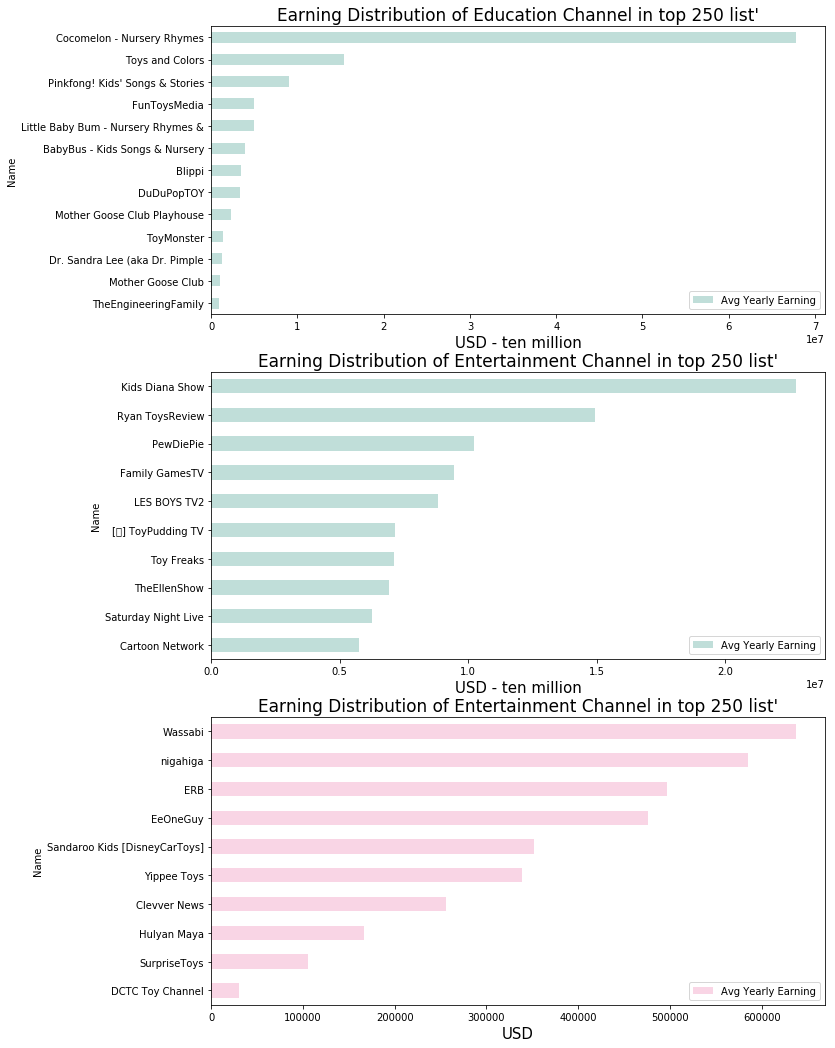

In [61]:
fig, axes = plt.subplots(3, 1, figsize=(11, 18))

axes[0] = youtubeChannelEarning(educationViews, 'Education', axes, 0)
axes[1] = youtubeChannelEarning(entertainmentViews_top, 'Entertainment', axes, 1)
axes[2] = youtubeChannelEarning(entertainmentViews_tail, 'Entertainment', axes, 2)
 
fig.subplots_adjust(hspace=.2)

### Finding

Without outlier, sports type Youtube channel earns the largest amount of money. On top of that, we can notice that there is a big difference between news category channel with large amount of views and subscribers. The earning amount of howto type channel has this large difference as well. This might because we watch news on Youtube page a lot but tend to not subscribe the news channel.

There are lots of Entertainment type Youtube channel (65 videos). Some of the channels earn more money than others and some are lower than average. The mean earning of Entertainment channel is not that high. We might draw the conclusion that "Entertainment" type Youtube channel might be too competitive to make the largest amount of money. It is not the most profitable channel type in average.

## Part 2
## 2.1 Top U.S. Youtubers will have more trending videos than other Youtube channels

In [62]:
trending_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,days_spent_to_trend,Month,Year,trend_MY
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,1,11,2017,2017-11-01
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,1,11,2017,2017-11-01
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,2,11,2017,2017-11-01
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,1,11,2017,2017-11-01
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,2,11,2017,2017-11-01


In [63]:
unique_trend = trending_df.groupby(['channel_title'])['title'].nunique().to_frame()
unique_trend.columns = ['count_trending']
unique_trend = unique_trend.reset_index()

In [64]:
unique_trend.head(10)

,channel_title,count_trending
0,12 News,1
1,1MILLION Dance Studio,4
2,1theK (원더케이),5
3,20th Century Fox,17
4,2CELLOS,1
5,3Blue1Brown,3
6,3D Printing Nerd,2
7,42Fab - Metalworking and Multi-Medium Fabrication,1
8,494ta,1
9,4given4ever1,1


In [65]:
# find the rank of count_trending 
def get_rank(df, title, count):
    """ This function calculated the rank of the number of trending videos of Top 250 Youtube channels
    
    :param title: channel titles that derive from the dataframe
    :param title: column name that represents the channel titles
    :param count: column name that represents the trending video counts
    :return: a list of ranks
    >>> trending_df = pd.read_csv('data/USvideos.csv')
    >>> unique_trend = trending_df.groupby(['channel_title'])['title'].nunique().to_frame()
    >>> unique_trend.columns = ['count_trending']
    >>> unique_trend = unique_trend.reset_index()
    >>> unique_trend_temp = unique_trend[['channel_title', 'count_trending']].sort_values(by='count_trending', ascending=False)
    >>> rank = get_rank(df, 123, 111)
    Traceback (most recent call last):
    NameError: name 'df' is not defined
    >>> rank = get_rank(unique_trend_temp, 123, 111)
    Traceback (most recent call last):
    KeyError: "None of [Int64Index([123, 111], dtype='int64')] are in the [columns]"
    >>> rank = get_rank(unique_trend_temp, 'channel_title', 'count_trending')    
    """ 
    new_df = df[[title, count]].sort_values(by=count, ascending=False)
    
    
    rank = []
    count = list(new_df[count])
    for i in range(len(count)):
        if len(rank) == 0: # if list is empty
            rank.append(i+1)
        else:
            if count[i] == count[i-1]: # if same as the previous one
                rank.append(rank[i-1])
            else:
                rank.append(i+1)
    return rank

In [66]:
unique_trend_temp = unique_trend[['channel_title', 'count_trending']].sort_values(by='count_trending', 
                                                                                  ascending=False)
count_rank = get_rank(unique_trend_temp, 'channel_title', 'count_trending')

unique_trend_temp["count_rank"] = count_rank

In [67]:
unique_trend_temp.head()

,channel_title,count_trending,count_rank
555,ESPN,84,1
1804,TheEllenShow,74,2
1785,The Tonight Show Starring Jimmy Fallon,72,3
889,Jimmy Kimmel Live,70,4
1753,The Late Show with Stephen Colbert,58,5


In [68]:
top250_views_df.head()

,US Rank,Grade,Name,Uploads,Subscribers,Views,Category,Created Date,Daily Average Subs,Daily Average Views,Min Daily Earning,Max Daily Earning,Min Monthly Earning,Max Monthly Earning,Min Yearly Earning,Max Yearly Earning,World Subscriber Rank,World Video View Rank,URL
0,1,A+,WWE,40805,42099730,31435620458,Sports,"May 11th, 2007",45303,24296400,6100,97200,182200,2900000,2200000,35000000,12,3,https://socialblade.com/youtube/user/wwefannation
1,2,A+,Ryan ToysReview,1356,18989260,28730791075,Entertainment,"Mar 17th, 2015",11527,19519500,4900,78100,146400,2300000,1800000,28100000,101,4,https://socialblade.com/youtube/user/hgjghz9so...
2,3,A++,Cocomelon - Nursery Rhymes,416,44127136,25541274029,Education,"Sep 1st, 2006",125711,88514800,22100,354100,663900,10600000,8000000,127500000,11,7,https://socialblade.com/youtube/user/checkgate
3,4,A+,Movieclips,32246,24964732,22285854340,Film & Animation,"Apr 28th, 2006",37300,25595300,6400,102400,192000,3100000,2300000,36900000,46,10,https://socialblade.com/youtube/user/movieclips
4,5,A+,PewDiePie,3806,94272352,21161543119,Entertainment,"Apr 29th, 2010",146229,13416000,3400,53700,100600,1600000,1200000,19300000,3,11,https://socialblade.com/youtube/user/pewdiepie


In [69]:
def merge_trend(df1, df2):
    """ This function merges the top youtube channel information and the video rank information together
    
    :param df1: dataframe that consists of the top youtube channel information
    :param df2: dataframe that consists of trending video rank information
    :return: a merged dataframe
    >>> df1 = pd.DataFrame({'channel_title' : [1]})
    >>> df2 = pd.DataFrame({'channel_title' : [2]})
    >>> new_df = merge_trend(df1, df2)
    Traceback (most recent call last):
    KeyError: 'Name'
    >>> df1 = pd.DataFrame({'Name' : [1, 2, 3, 4, 5], 'count_trending' : [1, 9, 2, 4, 3]})
    >>> df2 = pd.DataFrame({'channel_title' : [1, 2, 3, 4, 5], 'count_rank': [5, 1, 4, 2, 3]})
    >>> new_df = merge_trend(df1, df2)
    >>> new_df['count_rank']
    0    5
    1    1
    2    4
    3    2
    4    3
    Name: count_rank, dtype: int64
    >>> df1 = pd.DataFrame({'Name' : [1, 2, 3, 4, 5], 'count_trending' : [1, 9, 2, 4, 3]})
    >>> df2 = pd.DataFrame({'channel_title' : [2, 1, 3, 4, 5], 'count_rank': [5, 1, 4, 2, 3]})
    >>> new_df = merge_trend(df1, df2)
    >>> new_df['count_rank']
    0    1
    1    5
    2    4
    3    2
    4    3
    Name: count_rank, dtype: int64   
    """ 
    new_df = pd.merge(df1, df2, left_on='Name',right_on='channel_title', how='left', indicator=True)
    
    new_df['count_trending'] = new_df['count_trending'].fillna(0)
    new_df['count_rank'] = new_df['count_rank'].fillna(max(df2['count_rank'])+1)
    
    return new_df

In [70]:
top250_trend_views = merge_trend(top250_views_df, unique_trend_temp)
top250_trend_subs = merge_trend(top250_subs_df, unique_trend_temp)

In [71]:
top250_trend_views.head()

,US Rank,Grade,Name,Uploads,Subscribers,Views,Category,Created Date,Daily Average Subs,Daily Average Views,...,Max Monthly Earning,Min Yearly Earning,Max Yearly Earning,World Subscriber Rank,World Video View Rank,URL,channel_title,count_trending,count_rank,_merge
0,1,A+,WWE,40805,42099730,31435620458,Sports,"May 11th, 2007",45303,24296400,...,2900000,2200000,35000000,12,3,https://socialblade.com/youtube/user/wwefannation,WWE,34.00,17.00,both
1,2,A+,Ryan ToysReview,1356,18989260,28730791075,Entertainment,"Mar 17th, 2015",11527,19519500,...,2300000,1800000,28100000,101,4,https://socialblade.com/youtube/user/hgjghz9so...,NaN,0.00,848.00,left_only
2,3,A++,Cocomelon - Nursery Rhymes,416,44127136,25541274029,Education,"Sep 1st, 2006",125711,88514800,...,10600000,8000000,127500000,11,7,https://socialblade.com/youtube/user/checkgate,NaN,0.00,848.00,left_only
3,4,A+,Movieclips,32246,24964732,22285854340,Film & Animation,"Apr 28th, 2006",37300,25595300,...,3100000,2300000,36900000,46,10,https://socialblade.com/youtube/user/movieclips,NaN,0.00,848.00,left_only
4,5,A+,PewDiePie,3806,94272352,21161543119,Entertainment,"Apr 29th, 2010",146229,13416000,...,1600000,1200000,19300000,3,11,https://socialblade.com/youtube/user/pewdiepie,PewDiePie,1.00,847.00,both


Text(0.5, 1.0, 'US Subscribers Rank vs Trending Video Rank')

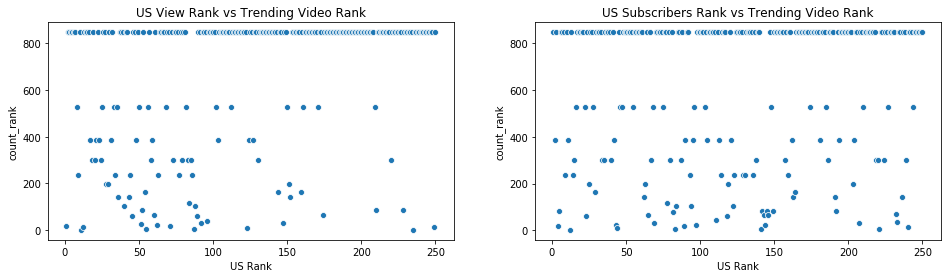

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

g1 = sns.scatterplot(x="US Rank", y="count_rank", data=top250_trend_views, ax=axes[0])
axes[0].set_title('US View Rank vs Trending Video Rank')

g2 = sns.scatterplot(x="US Rank", y="count_rank", data=top250_trend_subs, ax=axes[1])
axes[1].set_title('US Subscribers Rank vs Trending Video Rank')

In [73]:
# calculate the proportion of trending videos uploaded by Top 250 channels based on views and world total trending videos 
top250_trend_views['count_trending'].sum() / unique_trend_temp['count_trending'].sum()

0.14502164502164502

In [74]:
# count number of Youtubers that have trending videos in given time period
len(top250_trend_views[top250_trend_views['count_trending']!=0])

95

In [75]:
# calculate the proportion of trending videos uploaded by Top 250 channels based on views and world total trending videos 
top250_trend_subs['count_trending'].sum() / unique_trend_temp['count_trending'].sum()

0.15940012368583797

In [76]:
# count number of Youtubers that have trending videos in given time period
len(top250_trend_subs[top250_trend_subs['count_trending']!=0])

124

### Findings

The result showed that having more more subscribers or video views, does not mean they will definitly have more trending videos in the given time. Although there is no direct relationship between ranks of subscriber or views and number of trending videos, the dataset demonstrates an interesting result when we compare the top YouTube channels with the entire YouTube channels in the world. 

Among the Top 250 US YouTube Channels based on number of subs or views, **around 40% - 50%** of them have trending videos in the given time period, which accounted for **around 15%** of the numbers trending videos in the given time. According to SocialBlade and Youtube statistics, YouTube is launched in 91 countries and there are around 23 million YouTube channels in the world. Top 250 US Youtube channels are only **0.001%** of the total number of youtube channels in the world. This showed how the small proportion of the channels play important roles in contributing to the increase of the Youtube video views for the platform.

SocialBlade Source: https://socialblade.com/info

## 2.2 If you own a top-ranking Youtube channel in the U.S., you can make a big profit

In [77]:
top250_subs_df.describe()

,US Rank,Uploads,Subscribers,Views,Daily Average Subs,Daily Average Views,Min Daily Earning,Max Daily Earning,Min Monthly Earning,Max Monthly Earning,Min Yearly Earning,Max Yearly Earning,World Subscriber Rank,World Video View Rank,Avg Monthly Earnings
count,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00,250.00
mean,125.50,2578.37,14446525.74,4846015667.66,10036.12,3552674.00,892.73,14257.38,26734.54,426985.35,322080.51,5132599.20,290.93,12848.24,226859.95
std,72.31,12342.47,8646941.05,5050078002.58,17225.03,7160204.40,1788.41,28614.68,53649.75,856864.07,647280.22,10302168.63,168.15,85933.38,455255.86
min,1.00,2.00,7870292.00,2547288.00,-2185.00,-1562510.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,3.00,0.00
25%,63.25,133.50,9546565.25,1419268433.25,1804.75,610178.25,152.75,2425.00,4550.00,73250.00,54950.00,878650.00,142.75,155.50,38900.00
50%,125.50,386.50,11689737.00,3180710513.50,4918.00,1770080.00,442.50,7050.00,13300.00,212400.00,159350.00,2550000.00,286.50,481.00,112850.00
75%,187.75,1413.25,16691276.00,6412920207.25,11551.75,4124915.00,1000.00,16525.00,30900.00,495025.00,371250.00,5975000.00,429.50,1486.25,262962.50
max,250.00,132237.00,94275479.00,31435620458.00,146229.00,88514800.00,22100.00,354100.00,663900.00,10600000.00,8000000.00,127500000.00,591.00,952708.00,5631950.00


In [78]:
# calculate the average yearly earning
top250_subs_df['Avg Yearly Earning'] = (top250_subs_df['Max Yearly Earning'] + top250_subs_df['Min Yearly Earning']) / 2
top250_views_df['Avg Yearly Earning'] = (top250_views_df['Max Yearly Earning'] + top250_views_df['Min Yearly Earning']) / 2

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


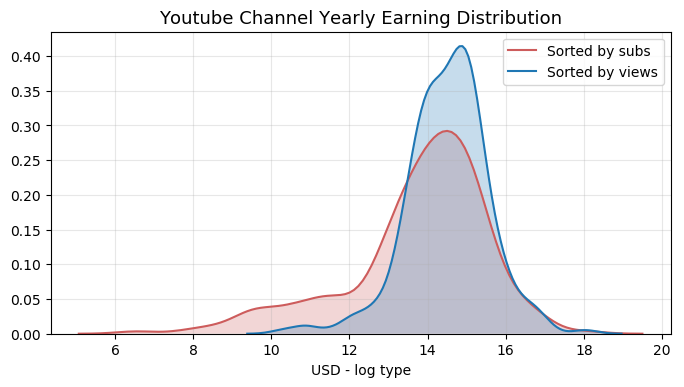

In [79]:
# plot the earning distribution for all dataset in log scale
plt.figure(figsize=(8,4), dpi= 100)
sns.kdeplot(np.log(top250_subs_df['Avg Yearly Earning']), shade=True, color='indianred', label='Sorted by subs')
sns.kdeplot(np.log(top250_views_df['Avg Yearly Earning']), shade=True, label='Sorted by views')

plt.title("Youtube Channel Yearly Earning Distribution", fontsize=13)
plt.xlabel("USD - log type", fontsize=10)
plt.grid(axis='both', alpha=.3)
plt.legend(loc='upper right', fontsize=10)
plt.show()

### Draw the earning distribution indicator plot

In [80]:
# we define the yearly earning value at Q3 - 6000000 as the bar of super rich youtube channel
earningSubs = top250_subs_df[['Category','Max Yearly Earning']]
earningSubs = earningSubs[earningSubs['Max Yearly Earning'] > 6000000]

In [81]:
count1 = earningSubs.groupby('Category').count()
total1 = earningSubs.groupby('Category').sum()

infoSubs = pd.merge(count1, total1, how='inner', on=['Category'])
infoSubs.columns = ['Count', 'Top earning']

In [82]:
# pivot table which is used for categorizing channel type
def pivottable_Creation(df_name):
    """ The function is used for categorizing channel type.

    :param df_name: dataframe
    :return: a complete dataframe
    >>> top250_subs_df = pd.read_csv('data/top250_us_youtube_by_subs.csv')
    >>> categories_subs_df = pivottable_Creation(top250_subs_df)
    >>> categories_subs_df.columns[0] == 'Max Yearly Earning'
    True
    """
    pivotTable = pd.pivot_table(df_name, values=['Uploads', 'Subscribers', 'Views', 'URL', 'Min Yearly Earning', 'Max Yearly Earning'], 
                            index=['Category'], aggfunc={'Uploads': np.sum, 'Subscribers': np.sum, 'Views': np.sum, 
                                                         'URL': 'count', 'Min Yearly Earning':np.sum, 'Max Yearly Earning':np.sum})
    return pivotTable

In [83]:
categories_subs_df = pivottable_Creation(top250_subs_df)
categories_subs_df['Avg Yearly Earning'] = (categories_subs_df['Max Yearly Earning'] + categories_subs_df['Min Yearly Earning']) / 2
extractSubs = categories_subs_df[['Avg Yearly Earning', 'URL']]

In [84]:
# Select some categories which include the high earning channels
finalSubs = pd.merge(extractSubs, infoSubs, how='inner', on=['Category'])
finalSubs.columns = ['Total earning', 'Total count', 'Top count', 'Top earning']
finalSubs['Indicator'] = finalSubs['Top earning'] / finalSubs['Total earning'] / finalSubs['Top count'] / finalSubs['Total count'] * 10
finalSubs.sort_values(by='Category',ascending=False, inplace=True)

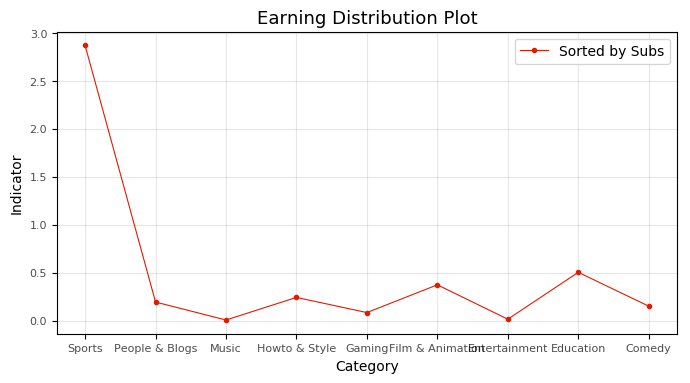

In [85]:
# The plot shows the earning distribution indicator in categories
subs_info = finalSubs['Indicator']

plt.figure(figsize=(8,4), dpi= 100)
plt.plot(subs_info, linewidth = 0.8, marker = '.', label = "Sorted by Subs", color='#E11B00')

plt.xlabel("Category", fontsize=10)
plt.ylabel("Indicator", fontsize=10)
plt.xticks(fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=8, alpha=.7)
plt.title("Earning Distribution Plot", fontsize=13)
plt.grid(axis='both', alpha=.3)
plt.legend()
plt.show()

In [86]:
top250Subs_sort = top250_subs_df.sort_values(by='Max Yearly Earning',ascending=False)
top250Subs_sort.tail(10)

,US Rank,Grade,Name,Uploads,Subscribers,Views,Category,Created Date,Daily Average Subs,Daily Average Views,...,Max Daily Earning,Min Monthly Earning,Max Monthly Earning,Min Yearly Earning,Max Yearly Earning,World Subscriber Rank,World Video View Rank,URL,Avg Monthly Earnings,Avg Yearly Earning
65,66,B-,ChrisBrownTV,17,15970092,32145558,Music,"Dec 20th, 2006",7332,13511,...,54,101,1600,1200,19500,155,94076,https://socialblade.com/youtube/user/chrisbrowntv,850.50,10350.00
103,104,B-,Becky G,55,12716253,34201840,Music,"Sep 6th, 2011",6977,12288,...,49,92,1500,1100,17700,239,88465,https://socialblade.com/youtube/user/beckygoff...,796.00,9400.00
59,60,B-,ImagineDragons,51,17422113,18332720,Music,"Aug 3rd, 2009",12641,6734,...,27,51,808,606,9700,133,159427,https://socialblade.com/youtube/user/imaginedr...,429.50,5153.00
20,21,B-,Luis Fonsi,73,24926706,16470127,Entertainment,"Feb 25th, 2014",11785,5903,...,24,44,708,531,8500,47,175982,https://socialblade.com/youtube/user/luisfonsi...,376.00,4515.50
164,165,C+,Meghan Trainor,11,10386313,2547288,People & Blogs,"Jun 4th, 2008",2283,3417,...,14,26,410,308,4900,368,926311,https://socialblade.com/youtube/user/mtrainor22,218.00,2604.00
246,247,C+,Justin Timberlake,14,7978480,22418744,Music,"May 14th, 2006",1837,925,...,4,7,111,83,1300,581,131059,https://socialblade.com/youtube/user/justintim...,59.00,691.50
190,191,A,Atlantic Records,1077,9451856,8571350426,Music,"Dec 15th, 2006",4831,-994259,...,0,0,0,0,0,439,93,https://socialblade.com/youtube/user/atlanticv...,0.00,0.00
224,225,B,Shane Dawson TV,204,8483543,1091661212,Comedy,"Mar 10th, 2008",101,-1562510,...,0,0,0,0,0,531,2057,https://socialblade.com/youtube/user/shanedaws...,0.00,0.00
175,176,B,VitalyzdTv,294,9884229,1642530285,Entertainment,"Aug 7th, 2011",641,-262066,...,0,0,0,0,0,405,1231,https://socialblade.com/youtube/user/vitalyzdtv,0.00,0.00
116,117,A,Kids TV - Nursery Rhymes And Baby,2444,12154359,6076353301,Education,"Aug 30th, 2013",12910,-290520,...,0,0,0,0,0,267,175,https://socialblade.com/youtube/user/7pq3ko42y...,0.00,0.00


In [87]:
# Compute the average earning of top 250 youtuber
(top250_subs_df['Max Yearly Earning'] + top250_subs_df['Min Yearly Earning']).sum() / 500

2727339.856

### Findings

Take a look at the first plot. This shows that the earning of Youtube channel is mostly located in the range of 1 to 5 million USD. If you own a top ranking Youtube channel in the U.S., it will bring lots of profit to you. The average earning is about 2 million USD for one year!

If we see the last 10 row of datasets sorted by their earning, we can notice that some earning of the Youtube channel is a lot less than others. That is because of the earning calculation algorithm of SocialBlade website. Since it is the real-time data, it will responsively demonstrate the real condition of the channel. Take the last Youtube channel, Justin Timberlake for example, The recent date of the upload video of this channel is about two months ago. And the yearly earning of this channel is 1300 dollars which is a lot less than the average earning amount. This shows that top-ranking Youtuber needs to kepp uploading videos to earn more money. 

Specifically, we can define a simple function to obtain the sense of earning distribution in each category. The formula is shown as follow. The more the indicator is, the more earning gap there will be. The plot shows that Sports category has the largest indicator value and we might draw the conclusion that the earning distibution in Sports category channel is more unequal than others.

---------------------------------------------------------------------------------------------------------------------
Top Youtube channel earning percentage = (Amount of earning of top-ranking Youtube channel) / (Total amount of earning of Youtube channel in that category)

Top Youtube channel percentage = (Amount of top-ranking Youtube channel) / (Total amount of Youtube channel in that category)

Indicator = Top Youtube channel earning percentage / Top Youtube channel percentage